<a href="https://colab.research.google.com/github/Kaushik896/Pairs-Trading-Project/blob/main/Time_Series_Project_(to_be_submitted).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Installing Libraries

In [ ]:
import numpy as np
import pandas as pd
import yfinance as yf

import statsmodels
import statsmodels.api as sm
from statsmodels.tsa.stattools import coint, adfuller

import matplotlib.pyplot as plt

## Downloading the Dataset

In [ ]:
### function to download stock prices and making a data frame out of this:

import pandas as pd

def download_stock_data(stock_symbols, start_date= '2020-08-08', end_date= '2023-08-08'):
  data = pd.DataFrame()
  for symbol in stock_symbols:
    stock_data = yf.download(symbol, start=start_date, end=end_date)
    data[symbol] = stock_data['Adj Close']
  return data

# List of banking sector stocks
banking_stocks = ['^NSEBANK','HDFCBANK.NS', 'ICICIBANK.NS', 'SBIN.NS', 'KOTAKBANK.NS', 'AXISBANK.NS', 'INDUSINDBK.NS', 'BANDHANBNK.NS', 'IDFCFIRSTB.NS', 'RBLBANK.NS', 'FEDERALBNK.NS', 'CUB.NS', 'KARURVYSYA.NS']

# # Download data for the banking sector stocks
data_banking_stocks = download_stock_data(banking_stocks)


telecom_stocks = ['BHARTIARTL.NS', 'RELIANCE.NS', 'IDEA.NS', 'TATACOMM.NS', 'STLTECH.NS', 'TEJASNET.NS', 'ONMOBILE.NS', 'TANLA.NS', 'ITI.NS', 'HFCL.NS','GTPL.NS', 'AKSHOPTFBR.NS']
# Download data for the tele_stocks
data_telecom_stocks = download_stock_data(telecom_stocks)


entertainment_stocks = ['RELIANCE.NS', 'BHARTIARTL.NS', 'ZEEL.NS', 'SUNTV.NS', 'DISHTV.NS', 'HATHWAY.NS', 'TV18BRDCST.NS', 'NETWORK18.NS', 'DEN.NS', 'SITINET.NS', 'INOXLEISUR.NS', 'EROSMEDIA.NS', 'UFO.NS', 'JAGRAN.NS', 'DBCORP.NS', 'RADIOCITY.NS', 'ENIL.NS', 'NEXTMEDIA.NS', 'TVTODAY.NS']
# Download data for entertainment stocks
data_entertainment_stocks = download_stock_data(entertainment_stocks)


pharmaceutical_stocks = ['DIVISLAB.NS', 'DRREDDY.NS', 'SUNPHARMA.NS', 'CIPLA.NS', 'AUROPHARMA.NS', 'BIOCON.NS','LUPIN.NS', 'ALKEM.NS', 'TORNTPHARM.NS', 'GLENMARK.NS', 'ABBOTINDIA.NS', 'IPCALAB.NS', 'LAURUSLABS.NS', 'APLLTD.NS', 'STAR.NS', 'GRANULES.NS', 'NATCOPHARM.NS', 'AJANTPHARM.NS', 'AARTIDRUGS.NS']
data_pharamaceutical_stocks = download_stock_data(pharmaceutical_stocks)


oil_gas_stocks = ['RELIANCE.NS', 'ONGC.NS','IOC.NS', 'GAIL.NS', 'BPCL.NS', 'HINDPETRO.NS', 'IGL.NS', 'PETRONET.NS', 'OIL.NS', 'GSPL.NS', 'GUJGASLTD.NS', 'MGL.NS', 'CASTROLIND.NS', 'ATGL.NS', 'MRPL.NS', 'GULFOILLUB.NS','ALPHAGEO.NS', 'SELAN.NS', 'HINDOILEXP.NS']
data_oil_gas_stocks = download_stock_data(oil_gas_stocks)


automobile_stocks = ['^CNXAUTO','MARUTI.NS', 'M&M.NS', 'BAJAJ-AUTO.NS', 'EICHERMOT.NS', 'HEROMOTOCO.NS', 'TATAMOTORS.NS', 'TVSMOTOR.NS', 'ASHOKLEY.NS', 'BHARATFORG.NS', 'MRF.NS', 'BOSCHLTD.NS', 'AMARAJABAT.NS', 'APOLLOTYRE.NS', 'EXIDEIND.NS', 'BALKRISIND.NS', 'CEATLTD.NS', 'ENDURANCE.NS', 'ESCORTS.NS', 'FORCEMOT.NS']
data_automobile_stocks = download_stock_data(automobile_stocks)


consumer_goods_stocks = ['HINDUNILVR.NS', 'NESTLEIND.NS', 'BRITANNIA.NS', 'DABUR.NS', 'GODREJCP.NS', 'MARICO.NS', 'COLPAL.NS', 'EMAMILTD.NS', 'PGHH.NS', 'VBL.NS', 'JUBLFOOD.NS', 'UBL.NS', 'MCDOWELL-N.NS', 'RADICO.NS', 'BAJAJCON.NS', 'GILLETTE.NS', 'TATACONSUM.NS', 'ITC.NS', 'DMART.NS', 'FCONSUMER.NS']
data_consumer_goods_stocks = download_stock_data(consumer_goods_stocks)


cement_stocks = ['ULTRACEMCO.NS', 'SHREECEM.NS', 'AMBUJACEM.NS', 'ACC.NS', 'RAMCOCEM.NS', 'JKCEMENT.NS', 'DALBHARAT.NS', 'BIRLACORPN.NS', 'JKLAKSHMI.NS', 'HEIDELBERG.NS', 'INDIACEM.NS', 'ORIENTCEM.NS', 'STARCEMENT.NS', 'PRSMJOHNSN.NS', 'SAGCEM.NS', 'SANGHIIND.NS', 'NCLIND.NS', 'DECCANCE.NS', 'KCP.NS', 'MANGLMCEM.NS']
data_cement_stocks = download_stock_data(cement_stocks)


power_stocks = ['NTPC.NS', 'POWERGRID.NS', 'ADANIPOWER.NS', 'NHPC.NS', 'TATAPOWER.NS', 'GMRINFRA.NS', 'JSWENERGY.NS', 'TORNTPOWER.NS', 'ADANIGREEN.NS', 'ADANITRANS.NS', 'RELINFRA.NS', 'CESC.NS', 'SJVN.NS', 'KEC.NS', 'PTC.NS', 'THERMAX.NS', 'CGPOWER.NS', 'RTNPOWER.NS', 'INDOWIND.NS']
data_power_stocks = download_stock_data(power_stocks)


metail_mining_stocks = ['TATASTEEL.NS', 'JSWSTEEL.NS', 'HINDALCO.NS', 'VEDL.NS', 'JINDALSTEL.NS', 'SAIL.NS', 'HINDZINC.NS', 'NATIONALUM.NS', 'NMDC.NS', 'COALINDIA.NS', 'MOIL.NS', 'APLAPOLLO.NS', 'RATNAMANI.NS', 'WELCORP.NS', 'SARDAEN.NS', 'MAITHANALL.NS','GMDCLTD.NS', 'AIAENG.NS']
data_metail_mining_stocks  = download_stock_data(metail_mining_stocks)


healthcare_stocks = ['APOLLOHOSP.NS', 'LALPATHLAB.NS', 'FORTIS.NS', 'NH.NS', 'MAXHEALTH.NS', 'METROPOLIS.NS', 'THYROCARE.NS', 'ASTERDM.NS', 'HCG.NS', 'INDRAMEDCO.NS', 'SHALBY.NS','LOTUSEYE.NS']
data_healthcare_stocks = download_stock_data(healthcare_stocks)

infrastructure_stocks = ['LT.NS', 'ADANIPORTS.NS', 'POWERGRID.NS', 'NTPC.NS', 'GAIL.NS', 'NHPC.NS', 'IRB.NS', 'DBL.NS', 'KNRCON.NS', 'ASHOKA.NS', 'SADBHAV.NS', 'PNCINFRA.NS', 'NCC.NS', 'RELINFRA.NS', 'GAYAPROJ.NS', 'HGINFRA.NS', 'JKIL.NS', 'MEP.NS', 'RPPINFRA.NS', 'MONTECARLO.NS']
data_infrastructure_stocks = download_stock_data(infrastructure_stocks)


fmcg_stocks = ['^CNXFMCG','HINDUNILVR.NS', 'NESTLEIND.NS', 'BRITANNIA.NS', 'DABUR.NS', 'GODREJCP.NS', 'MARICO.NS', 'COLPAL.NS', 'EMAMILTD.NS', 'PGHH.NS', 'VBL.NS', 'JUBLFOOD.NS', 'UBL.NS', 'MCDOWELL-N.NS', 'RADICO.NS', 'BAJAJCON.NS', 'GILLETTE.NS', 'TATACONSUM.NS', 'ITC.NS', 'DMART.NS', 'FCONSUMER.NS']
data_fmcg_stocks = download_stock_data(fmcg_stocks)


retail_stocks = ['DMART.NS', 'FRETAIL.NS', 'ABFRL.NS', 'VMART.NS', 'TRENT.NS', 'SHOPERSTOP.NS', 'FLFL.NS', 'SPENCERS.NS', 'FCONSUMER.NS', 'FEL.NS', 'FMNL.NS', 'FSC.NS', 'ARVINDFASN.NS', 'CANTABIL.NS', 'KKCL.NS','SORILINFRA.NS', 'TCNSBRANDS.NS', 'V2RETAIL.NS', 'ZODIACLOTH.NS']
data_retail_stocks = download_stock_data(retail_stocks)


trans_logis_stocks = ['BLUEDART.NS', 'MAHLOG.NS', 'TCIEXP.NS', 'ALLCARGO.NS', 'GATI.NS', 'VRLLOG.NS', 'TCI.NS', 'SNOWMAN.NS', 'PATINTLOG.NS', 'SICAL.NS', 'AGARIND.NS', 'AEGISCHEM.NS', 'CONCOR.NS']
data_trans_logis_stocks = download_stock_data(trans_logis_stocks)


it_stocks = ['^CNXIT','TCS.NS', 'INFY.NS', 'WIPRO.NS', 'HCLTECH.NS', 'TECHM.NS','MPHASIS.NS', 'COFORGE.NS', 'PERSISTENT.NS', 'LTTS.NS','OFSS.NS', 'SONATSOFTW.NS', 'ECLERX.NS', 'ZENSARTECH.NS','MASTEK.NS','KPITTECH.NS','SASKEN.NS']
data_it_stocks = download_stock_data(it_stocks)


nifty50_stocks = ['^NSEI','ADANIPORTS.NS', 'ASIANPAINT.NS', 'AXISBANK.NS', 'BAJAJ-AUTO.NS', 'BAJFINANCE.NS', 'BAJAJFINSV.NS', 'BHARTIARTL.NS', 'BPCL.NS', 'CIPLA.NS', 'COALINDIA.NS', 'DIVISLAB.NS', 'DRREDDY.NS', 'EICHERMOT.NS', 'GRASIM.NS', 'HCLTECH.NS','HDFCBANK.NS', 'HEROMOTOCO.NS', 'HINDALCO.NS', 'HINDUNILVR.NS', 'ICICIBANK.NS', 'IOC.NS', 'INDUSINDBK.NS', 'INFY.NS', 'ITC.NS', 'JSWSTEEL.NS', 'KOTAKBANK.NS', 'LT.NS', 'M&M.NS', 'MARUTI.NS', 'NESTLEIND.NS', 'NTPC.NS', 'ONGC.NS', 'POWERGRID.NS', 'RELIANCE.NS', 'SHREECEM.NS', 'SBIN.NS', 'SUNPHARMA.NS', 'TCS.NS', 'TATAMOTORS.NS', 'TATASTEEL.NS', 'TATACONSUM.NS', 'TECHM.NS', 'TITAN.NS', 'ULTRACEMCO.NS', 'UPL.NS', 'WIPRO.NS', 'ADANIENT.NS', 'ADANIGREEN.NS', 'IOC.NS']
data_nifty50_stocks = download_stock_data(nifty50_stocks)


sensex30_companies_NSE = ['^BSESN','RELIANCE.NS', 'HDFCBANK.NS', 'ICICIBANK.NS', 'INFY.NS', 'TCS.NS', 'KOTAKBANK.NS', 'ITC.NS', 'HINDUNILVR.NS', 'LT.NS', 'SBIN.NS', 'AXISBANK.NS', 'BAJFINANCE.NS', 'BHARTIARTL.NS', 'ASIANPAINT.NS', 'MARUTI.NS', 'M&M.NS', 'HCLTECH.NS', 'TITAN.NS', 'SUNPHARMA.NS', 'BAJAJFINSV.NS', 'TATASTEEL.NS', 'ULTRACEMCO.NS', 'POWERGRID.NS', 'NTPC.NS', 'NESTLEIND.NS', 'TECHM.NS', 'WIPRO.NS', 'INDUSINDBK.NS', 'DRREDDY.NS']
data_sensex30 = download_stock_data(sensex30_companies_NSE)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ADANITRANS.NS']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['SICAL.NS']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******

## Checking Stationarity

In [ ]:
def check_for_stationarity(X, cutoff = 0.01):
    # Here we apply the augemented Dicky fuller test for testing stationarity of the series.
    # H_0 in adfuller is unit root exists (non-stationary).
    # We must observe significant p-value to convince ourselves that the series is stationary.
    pvalue = adfuller(X)[1]
    if pvalue < cutoff:
        rtn = ' The series is likely stationary.'
        return([pvalue, rtn])
    else:
        rtn = ' The series is likely non-stationary.'
        return([pvalue,rtn])

## Testing cointegration

In [ ]:
def is_cointegrated(data, thresh = 0.05):

  list_of_stocks = list(data.keys()) # list of stocks

  n = len(list_of_stocks) # number of stocks

  pairs = [] # this list will caputre all the co-integrated pairs

  t_stat_matrix = np.zeros((n, n))
  pvalue_matrix = np.ones((n, n))

  for i in range(n-1):
    stock1 = list_of_stocks[i]
    for j in range(i+1,n):
      stock2 = list_of_stocks[j]

      X1 = data[stock1]
      X2 = data[stock2]

      result = statsmodels.tsa.stattools.coint(X1, X2, trend='c', method='aeg', maxlag=None, autolag='aic', return_results=None)

      t_stat = result[0] # co-integration test statistic
      p_value = result[1] # p-value
      cric_value = result[2] # critical value

      t_stat_matrix[i, j] = t_stat
      pvalue_matrix[i, j] = p_value


      if p_value < thresh:
        # we reject the null hypothesis:
        pairs.append((list_of_stocks[i], list_of_stocks[j], p_value))

  return pairs, t_stat_matrix, pvalue_matrix

#### Finding cointegrated stocks using Engle Granger two step test in the banking sector.

In [ ]:
is_cointegrated(data_banking_stocks, thresh = 0.01)[0]

[('HDFCBANK.NS', 'AXISBANK.NS', 0.0006196704325857576),
 ('BANDHANBNK.NS', 'FEDERALBNK.NS', 0.003181490035559164),
 ('BANDHANBNK.NS', 'KARURVYSYA.NS', 0.0065748500124183495)]

In [ ]:
hdfc = data_banking_stocks['HDFCBANK.NS']
axis = data_banking_stocks['AXISBANK.NS']

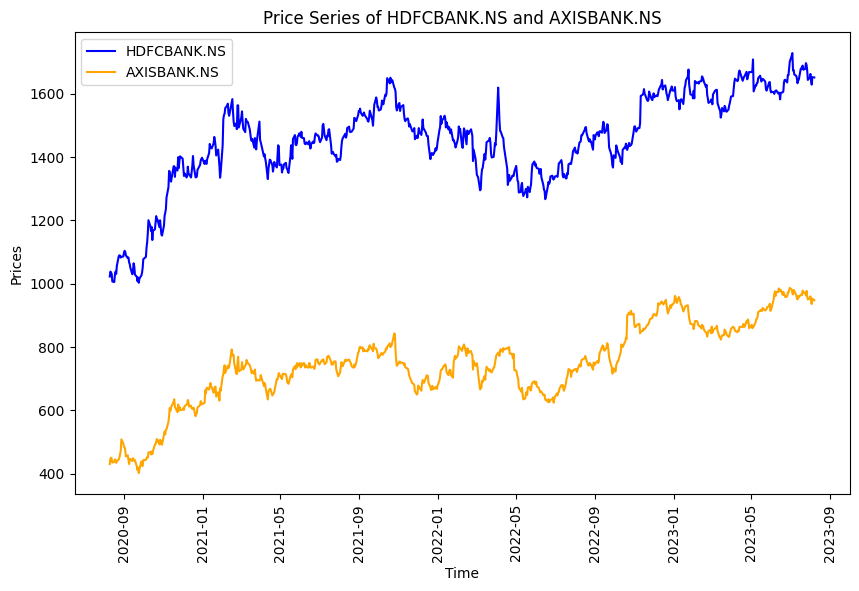

In [ ]:
plt.figure(figsize = (10,6))
plt.plot(hdfc, color = 'blue')
plt.plot(axis, color = 'orange')
plt.xlabel('Time')
plt.ylabel('Prices')
plt.xticks(rotation='vertical')
plt.title("Price Series of " + hdfc.name + " and " + axis.name)
plt.legend([hdfc.name, axis.name])
plt.show();

### Determining the cointegrating vector and spread




In [ ]:
def co_integrating_parameters_and_spread(stock1, stock2):
  # we know that stock1 and stock2 are co-integrated
  # we perform ordinary least squres to find out the relationship between these two stocks and choose the one with minimum p-value
  # while checking the stationarity


## case when stock 2 is considered as independent variable

  stc2 = sm.add_constant(stock2)
  model1 = sm.OLS(stock1, stc2).fit()
  params1 = model1.params

  predicted_values = model1.predict(stc2)
  diff1 = stock1-predicted_values
  p_val_1 = check_for_stationarity(diff1)[0]
  #print(p_val_1)

# case when stock1 is considered as independent variable

  stc1 = sm.add_constant(stock1)
  model2 = sm.OLS(stock2, stc1).fit()
  params2 = model2.params

  predicted_values = model2.predict(stc1)
  diff2 = stock2-predicted_values
  p_val_2 = check_for_stationarity(diff2)[0]
  #print(p_val_2)

  if min(p_val_2, p_val_1)<0.05:

    if p_val_1<p_val_2:
      return([params1],'second stock is independent and first one is dependent', diff1)
    else:
      return([params2],'first stock is independent and second one is dependent', diff2)


In [ ]:
co_integrating_parameters_and_spread(hdfc, axis)

([const          665.173834
  AXISBANK.NS      1.057728
  dtype: float64],
 'second stock is independent and first one is dependent',
 Date
 2020-08-10    -97.628685
 2020-08-11    -99.889530
 2020-08-12   -106.030770
 2020-08-13   -107.390404
 2020-08-14   -118.404241
                  ...    
 2023-08-01    -18.236822
 2023-08-02    -24.491083
 2023-08-03    -26.081085
 2023-08-04    -20.195227
 2023-08-07    -16.015224
 Length: 742, dtype: float64)

In [ ]:
spread = co_integrating_parameters_and_spread(hdfc, axis)[2]

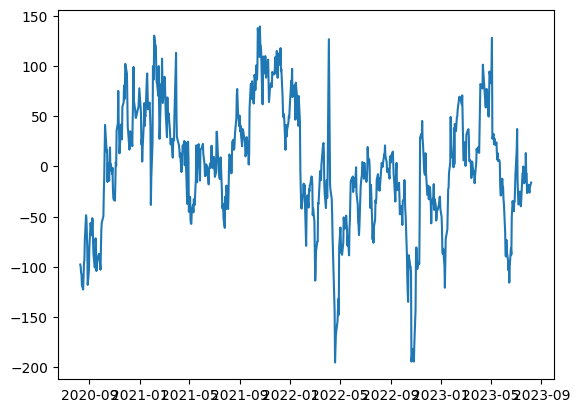

In [ ]:
plt.plot(spread)

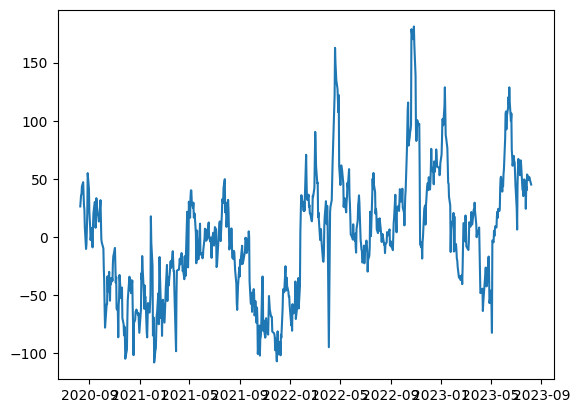

In [ ]:
model = sm.OLS(axis, sm.add_constant(hdfc)).fit()
predicted = model.predict(sm.add_constant(hdfc))
diff = axis -predicted
plt.plot(diff)

In [ ]:
## calculaitng z_score of the spread:

spread_z = (spread - spread.mean())/spread.std()

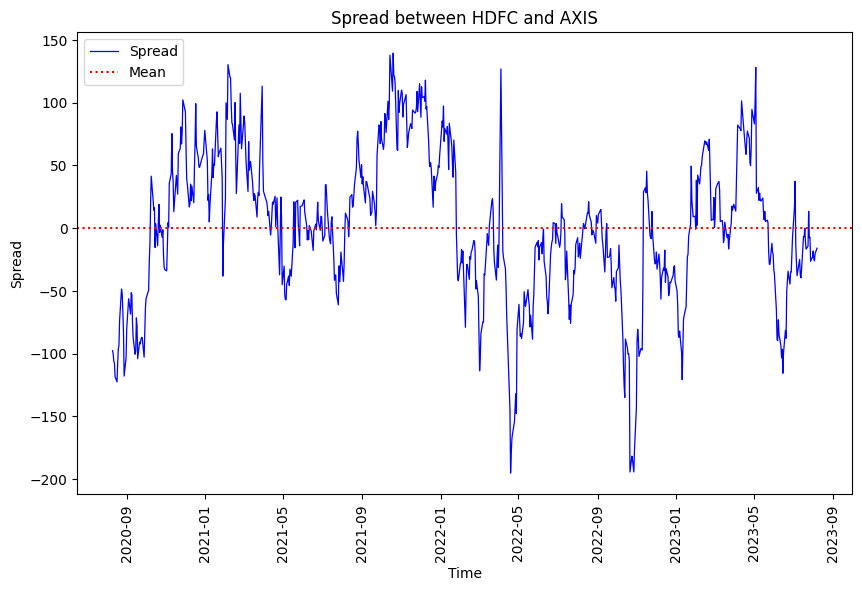

In [ ]:
## spread between hdfc and axis

plt.figure(figsize = (10,6))
plt.plot(spread, color = 'blue', linewidth = 0.9)
plt.xlabel('Time')
plt.ylabel('Spread')
plt.axhline(spread.mean(), color = 'red', linestyle = ':')
plt.xticks(rotation='vertical')
plt.title("Spread between HDFC and AXIS")
plt.legend(['Spread', 'Mean'])
plt.show();

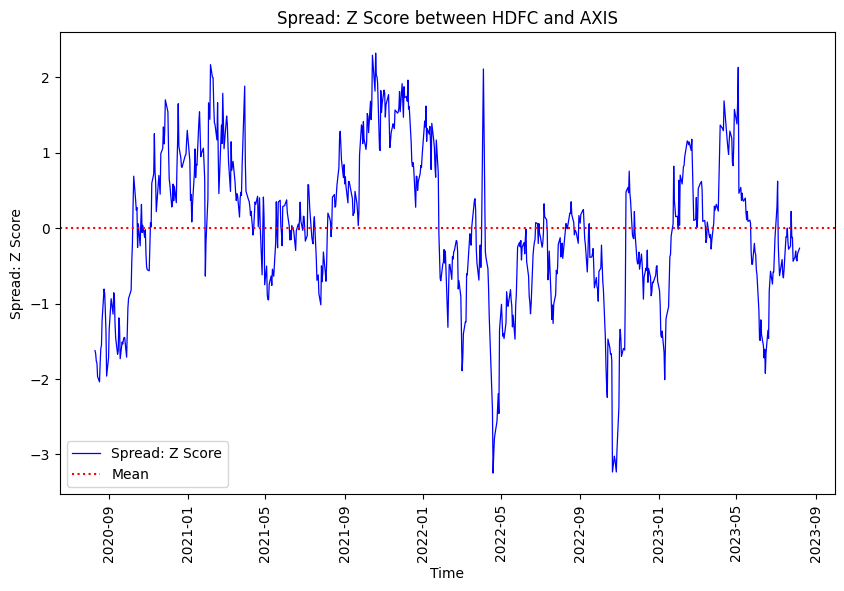

In [ ]:
# plotting the spread_z series

plt.figure(figsize = (10,6))
plt.plot(spread_z, color = 'blue', linewidth = 0.9)
plt.xlabel('Time')
plt.ylabel('Spread: Z Score')
plt.axhline(spread.mean(), color = 'red', linestyle = ':')
plt.xticks(rotation='vertical')
plt.title("Spread: Z Score between HDFC and AXIS")
plt.legend(['Spread: Z Score', 'Mean'])
plt.show();

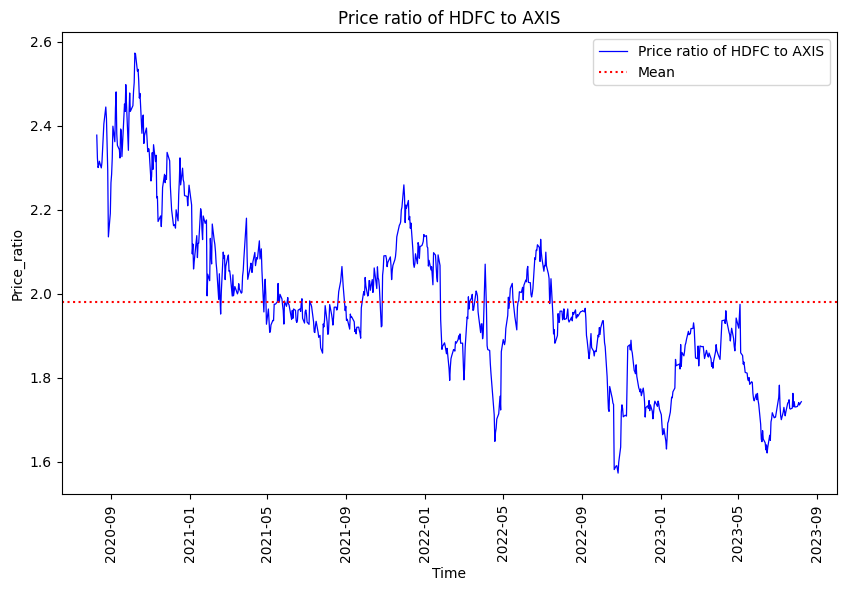

In [ ]:
price_ratio = hdfc/axis
plt.figure(figsize = (10,6))
plt.plot(price_ratio, color = 'blue', linewidth = 0.9)
plt.xlabel('Time')
plt.ylabel('Price_ratio')
plt.axhline(price_ratio.mean(), color = 'red', linestyle = ':')
plt.xticks(rotation='vertical')
plt.title("Price ratio of HDFC to AXIS")
plt.legend(['Price ratio of HDFC to AXIS', 'Mean'])
plt.show();

In [ ]:
(check_for_stationarity(spread), check_for_stationarity(price_ratio))

([9.449106337826108e-05, ' The series is likely stationary.'],
 [0.12955205909786494, ' The series is likely non-stationary.'])

## Generating trade signal with spread series

In [ ]:
n = len(spread)
n

742

In [ ]:
## Dividing the data into train and test set, we keep 70% data for training and 30% data for testing
train = spread[:int(n*0.7)]
test = spread[int(n*0.7):]

In [ ]:
len(train), len(test)

(519, 223)

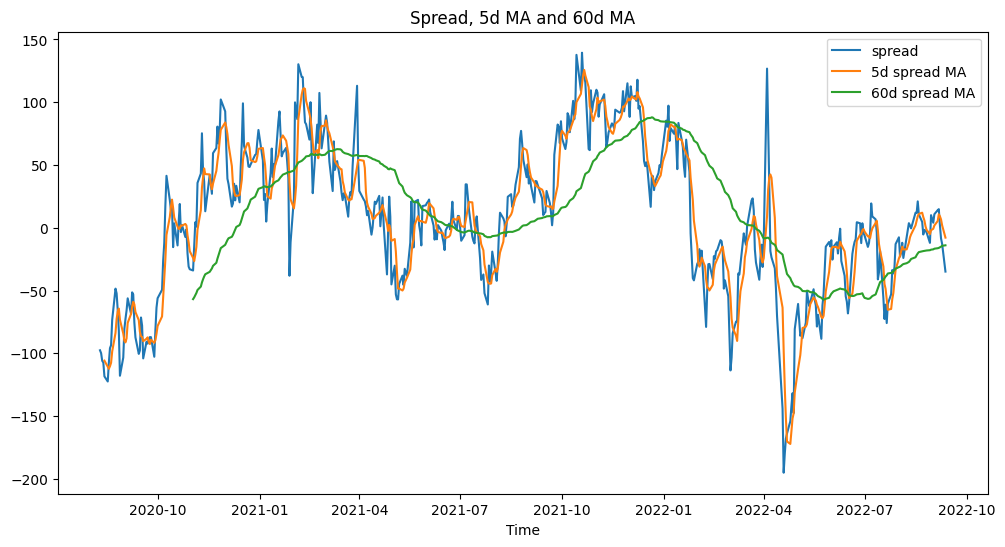

In [ ]:
spread_mavg5 = train.rolling(window=5, center=False).mean()
spread_mavg60 = train.rolling(window=60, center=False).mean()
std_60 = train.rolling(window=60, center=False).std()
plt.figure(figsize=(12, 6))
plt.plot(train.index, train.values)
plt.plot(spread_mavg5.index, spread_mavg5.values)
plt.plot(spread_mavg60.index, spread_mavg60.values)
plt.legend(['spread', '5d spread MA', '60d spread MA'])
plt.title("Spread, 5d MA and 60d MA")
plt.ylabel('')
plt.xlabel("Time")
plt.show()

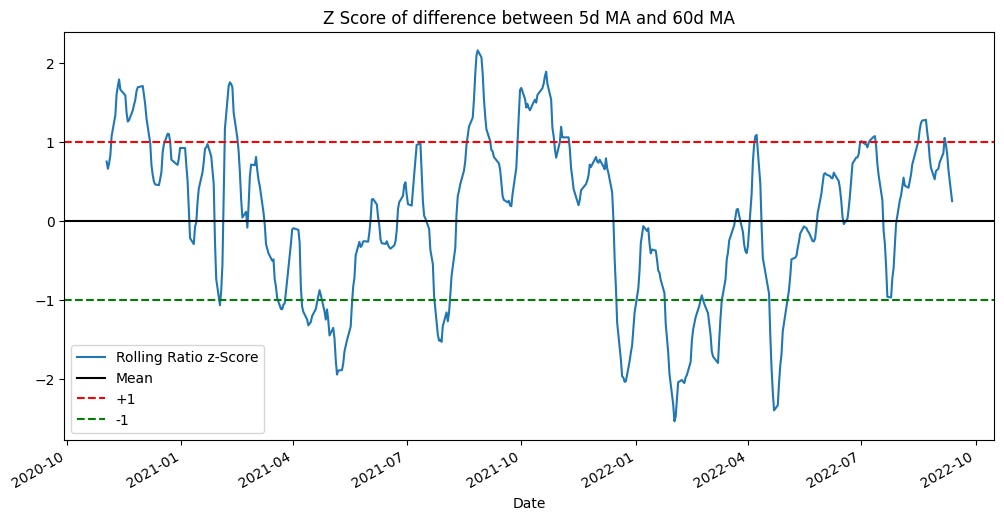

In [ ]:
zscore_60_5 = (spread_mavg5 - spread_mavg60)/std_60

plt.figure(figsize=(12,6))
zscore_60_5.plot()
plt.axhline(0, color='black')
plt.axhline(1.0, color='red', linestyle='--')
plt.axhline(-1.0, color='green', linestyle='--')
plt.legend(['Rolling Ratio z-Score', 'Mean', '+1', '-1'])
plt.title("Z Score of difference between 5d MA and 60d MA")
plt.show()

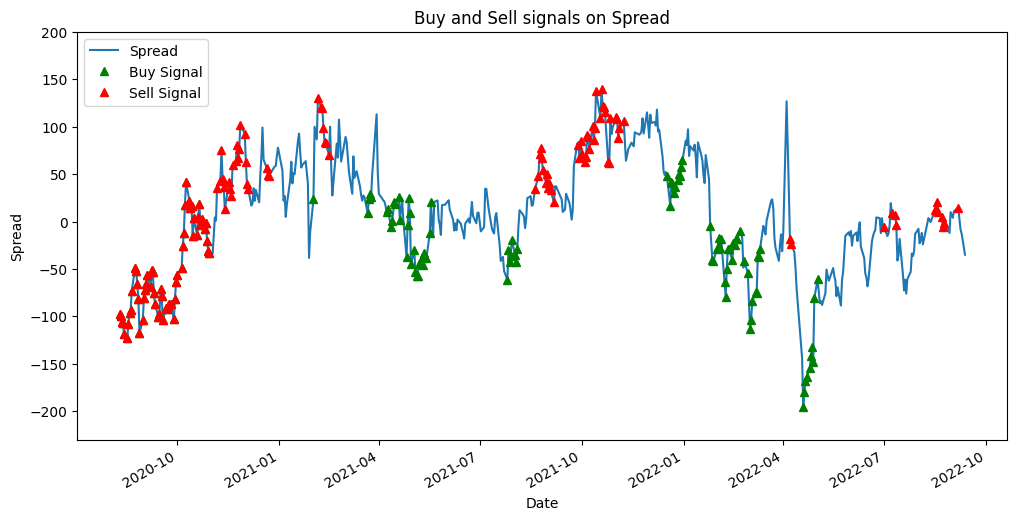

In [ ]:
plt.figure(figsize = (12,6))

train.plot()

buy = train.copy()
sell = train.copy()

buy[zscore_60_5>-1] = 1000
sell[zscore_60_5<1] = 1000

buy.plot(color='g', linestyle='None', marker='^')
sell.plot(color='r', linestyle='None', marker='^')
x1, x2, y1, y2 = plt.axis()
plt.axis((x1, x2, spread.min(), spread.max()))
plt.ylim(-230,200)
plt.title("Buy and Sell signals on Spread")
plt.ylabel("Spread")

plt.legend(['Spread', 'Buy Signal', 'Sell Signal'])
plt.show()

### Generating the  the trade and buy signals on individual price series.

In [ ]:
n = len(hdfc)
n

742

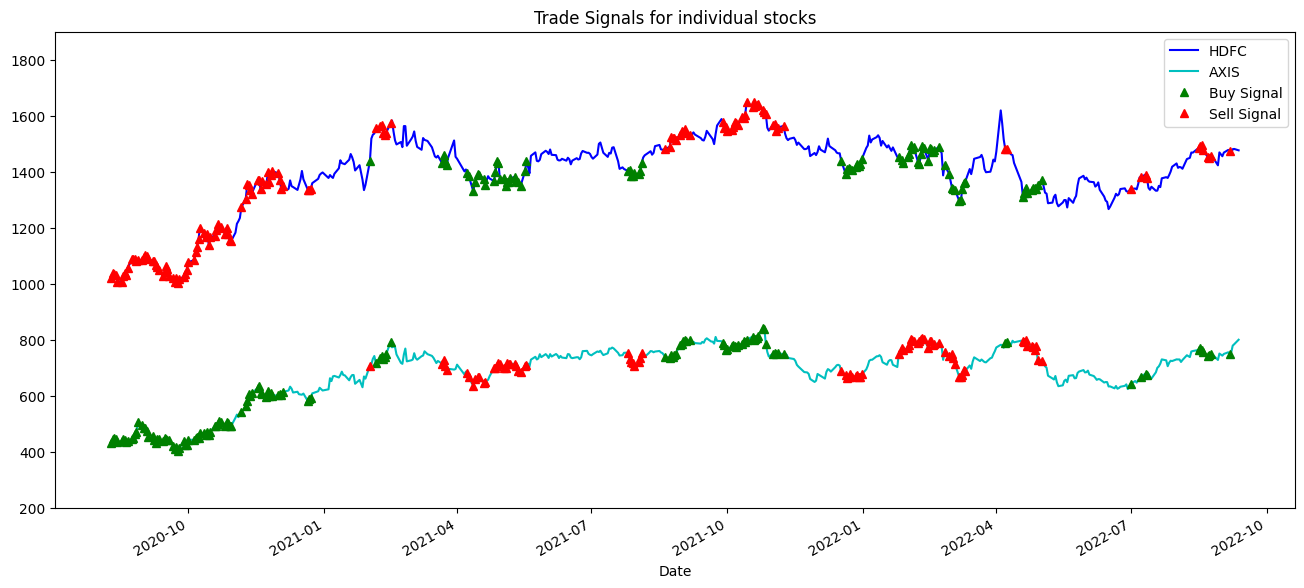

In [ ]:
plt.figure(figsize=(16,7))
S1 = data_banking_stocks['HDFCBANK.NS'].iloc[:int(n*0.7)]
S2 = data_banking_stocks['AXISBANK.NS'].iloc[:int(n*0.7)]  # This is the training set

S1.plot(color='b')
S2.plot(color='c')
buyR = 0*S1.copy()
sellR = 0*S1.copy()

#  When you buy the ratio, you buy stock S1 and sell S2
buyR[buy!=1000] = S1[buy!=1000] # buy contains the points where we need to buy the stock
sellR[buy!=1000] = S2[buy!=1000] # and we need to sell stock 2 where there is a signal to buy the ratio (buy!= gives the position where we have the buy signal)


# When you sell the ratio, you sell stock S1 and buy S2 (sell! = 0 gives the position where we need to seel the ratio)
buyR[sell!=1000] = S2[sell!=1000] # we need to buy S2 when there is a sell signal i.e. sell!=0
sellR[sell!=1000] = S1[sell!=1000] # we need to sell S1 when there is a sell signal i.e. sell!=0

buyR.plot(color='g', linestyle='None', marker='^')
sellR.plot(color='r', linestyle='None', marker='^')
x1, x2, y1, y2 = plt.axis()
plt.axis((x1, x2, min(S1.min(), S2.min()), max(S1.max(), S2.max())))
plt.ylim(200, 1900)

plt.title("Trade Signals for individual stocks")
plt.legend(['HDFC', 'AXIS', 'Buy Signal', 'Sell Signal'])
plt.show()


## Expected profit calculation

In [ ]:
hdfc = data_banking_stocks['HDFCBANK.NS']
axis = data_banking_stocks['AXISBANK.NS']
type(hdfc), type(axis)

(pandas.core.series.Series, pandas.core.series.Series)

In [ ]:
n = len(hdfc)

In [ ]:
axis_ = sm.add_constant(axis[:n//2])
model = sm.OLS(hdfc[:n//2], axis_).fit()
model.params

const          500.544310
AXISBANK.NS      1.338383
dtype: float64

In [ ]:
def trade(asset1, asset2, window1, window2, threshold_open_trade, threshold_close_trade, model): # here we assume that spread is calculated considering asset 2 as independent and asset 1 as dependent
# and we have the parameters from the training data
  S1 = asset1
  S2 = asset2

  cost_per_order = 0.0005 # ie. 0.5% of the total trade value

  total_cost = 0 # this captures the total cost of trading

  no_of_trading_instances = 0 # this captures the total number of trading instances

  ass2 = sm.add_constant(asset2)
  spread = asset1 - model.predict(ass2)

  price_ratio = asset1/asset2 # we buy and sell the stocks according to this ratio

  ma1 = spread.rolling(window = window1, center = False).mean()
  ma2 = spread.rolling(window = window2, center = False).mean()

  std = spread.rolling(window=window2, center=False).std()

  zscore = (ma1 - ma2)/std

  money = 0 # suppose we start with zero money
  countS1 = 0
  countS2 = 0 # and we start with no positions

  spread = list(spread)
  spread_length = len(spread)

  for i in range(spread_length):

    if zscore[i] < -(threshold_open_trade): # we buy ratio i.e. we sell stock2 and buy stock1

      no_of_trading_instances += 1
      trade_amt = S1[i] + S2[i]*price_ratio[i]
      total_cost += trade_amt*cost_per_order

      money += -S1[i]+S2[i]*price_ratio[i]
      countS1 += 1
      countS2 -= price_ratio[i]

    if zscore[i] > threshold_open_trade: # we sell the ratio i.e. we sell stock1 and buy stock

      no_of_trading_instances += 1
      trade_amt = S1[i]+S2[i]*price_ratio[i]
      total_cost += trade_amt*cost_per_order

      money += S1[i]-S2[i]*price_ratio[i]
      countS1 -= 1
      countS2 += price_ratio[i]


    if abs(zscore[i]) < threshold_close_trade: # in this case we close the all the trades adn realise the profits

      money += S1[i] * countS1 + S2[i] * countS2
      countS1 = 0
      countS2 = 0


  return([(money-total_cost), money, total_cost, no_of_trading_instances])



In [ ]:
m = trade(hdfc[n//2:], axis[n//2:], 5, 60, 1.5, 0.3, model)

In [ ]:
print(m)

[4228.43657305829, 4304.951575987978, 76.51500292968747, 49]


## Optimising the parameters to maximise expected profit

In [ ]:
hdfc = data_banking_stocks['HDFCBANK.NS']
axis = data_banking_stocks['AXISBANK.NS']
type(hdfc), type(axis)

(pandas.core.series.Series, pandas.core.series.Series)

In [ ]:
axis_ = sm.add_constant(axis[:n//2])
model = sm.OLS(hdfc[:n//2], axis_).fit()
model.params

const          500.544310
AXISBANK.NS      1.338383
dtype: float64

In [ ]:

def trade(asset1, asset2, window1, window2, threshold_open_trade, threshold_close_trade, model): # here we assume that spread is calculated considering asset 2 as independent and asset 1 as dependent
# and we have the parameters from the training data
  S1 = asset1
  S2 = asset2

  cost_per_order = 0.0005 # ie. 0.5% of the total trade value

  total_cost = 0 # this captures the total cost of trading

  no_of_trading_instances = 0 # this captures the total number of trading instances

  ass2 = sm.add_constant(asset2)
  spread = asset1 - model.predict(ass2)

  price_ratio = asset1/asset2 # we buy and sell the stocks according to this ratio

  ma1 = spread.rolling(window = window1, center = False).mean()
  ma2 = spread.rolling(window = window2, center = False).mean()

  std = spread.rolling(window=window2, center=False).std()

  zscore = (ma1 - ma2)/std

  money = 0 # suppose we start with zero money
  countS1 = 0
  countS2 = 0 # and we start with no positions

  spread = list(spread)
  spread_length = len(spread)

  for i in range(spread_length):

    if zscore[i] < -(threshold_open_trade): # we buy ratio i.e. we sell stock2 and buy stock1

      no_of_trading_instances += 1
      trade_amt = S1[i] + S2[i]*price_ratio[i]
      total_cost += trade_amt*cost_per_order

      money += -S1[i]+S2[i]*price_ratio[i]
      countS1 += 1
      countS2 -= price_ratio[i]

    if zscore[i] > threshold_open_trade: # we sell the ratio i.e. we sell stock1 and buy stock

      no_of_trading_instances += 1
      trade_amt = S1[i]+S2[i]*price_ratio[i]
      total_cost += trade_amt*cost_per_order

      money += S1[i]-S2[i]*price_ratio[i]
      countS1 -= 1
      countS2 += price_ratio[i]


    if abs(zscore[i]) < threshold_close_trade: # in this case we close the all the trades adn realise the profits

      money += S1[i] * countS1 + S2[i] * countS2
      countS1 = 0
      countS2 = 0


  return([(money-total_cost), money, total_cost, no_of_trading_instances])



In [ ]:

from tqdm import tqdm_notebook
from itertools import product

def optimise_trade(s1,s2, parameter_list, model):
  opt = parameter_list[0]  # stores he optimum parameter
  opt_profit = trade(s1, s2, parameter_list[0][0], parameter_list[0][1], parameter_list[0][2], parameter_list[0][3], model)[0] # stores maximum profit

  for param in tqdm_notebook(parameter_list):
        try:
            profit = trade(s1, s2, param[0], param[1], param[2], param[3], model)[0]
        except:
            continue
        if profit > opt_profit:
          opt = param
          opt_profit = profit
  return(opt, opt_profit)

In [ ]:
window1 = np.arange(1,20,1)
window2 = np.arange(20,80,10)
threshold_open = np.arange(0.5, 3, 0.05)
threshold_close = np.arange(0.01,0.5,0.02)

In [ ]:
parameters = product(window1, window2, threshold_open, threshold_close)
parameter_list = list(parameters)

In [ ]:
# result = optimise_trade(hdfc[n//2:], axis[n//2:], parameter_list, model)
# result

<ipython-input-42-03421326edac>:8: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for param in tqdm_notebook(parameter_list):


  0%|          | 0/142500 [00:00<?, ?it/s]

((11, 30, 0.5, 0.06999999999999999), 17230.66589417379)

In [ ]:
max_profit = trade(hdfc[n//2:],axis[n//2:] , 11, 30, 0.5, 0.07, model)
max_profit

[17230.66589417379, 17617.110477181603, 386.4445830078124, 254]

## **Finding non-cointegrated pair with high correlation**

In [ ]:
from itertools import combinations

def column_pairs(dataframe):
    columns = dataframe.columns
    pairs = list(combinations(columns, 2))
    return pairs

In [ ]:
total_pairs = column_pairs(data_banking_stocks)      # find all pairs of colum names

In [ ]:
def cointegrated_pairs(data, thresh = 0.05):

  list_of_stocks = list(data.keys()) # list of stocks

  n = len(list_of_stocks) # number of stocks

  pairs = [] # this list will caputre all the co-integrated pairs

  t_stat_matrix = np.zeros((n, n))
  pvalue_matrix = np.ones((n, n))

  for i in range(n-1):
    stock1 = list_of_stocks[i]
    for j in range(i+1,n):
      stock2 = list_of_stocks[j]

      X1 = data[stock1]
      X2 = data[stock2]

      result = statsmodels.tsa.stattools.coint(X1, X2, trend='c', method='aeg', maxlag=None, autolag='aic', return_results=None)

      t_stat = result[0] # co-integration test statistic
      p_value = result[1] # p-value
      cric_value = result[2] # critical value

      t_stat_matrix[i, j] = t_stat
      pvalue_matrix[i, j] = p_value


      if p_value < thresh:
        # we reject the null hypothesis:
        pairs.append((list_of_stocks[i], list_of_stocks[j]))

  return pairs

In [ ]:
coint_pairs = cointegrated_pairs(data_banking_stocks, thresh = 0.05)   # finding list of co-integrated pairs

In [ ]:
non_cointegrated_pairs = list(set(total_pairs) - set(coint_pairs))


In [ ]:
def find_correlation(data,pairs):
  n = len(pairs)
  result = []
  for i in range(0,n):
    cor = data[pairs[i][0]].corr(data[pairs[i][1]])
    result.append([pairs[i],cor])
  return result

In [ ]:
corr_ = find_correlation(data_banking_stocks, non_cointegrated_pairs)

In [ ]:
corr_data = pd.DataFrame(corr_, columns = ['Pairs', 'Correlation'])


In [ ]:
corr_data  = corr_data.sort_values(by = 'Correlation', ascending = False)

In [ ]:
corr_data.head()

,Pairs,Correlation
27,"(ICICIBANK.NS, SBIN.NS)",0.980274
21,"(^NSEBANK, ICICIBANK.NS)",0.966335
40,"(^NSEBANK, AXISBANK.NS)",0.965117
46,"(^NSEBANK, SBIN.NS)",0.954400
30,"(ICICIBANK.NS, FEDERALBNK.NS)",0.950076


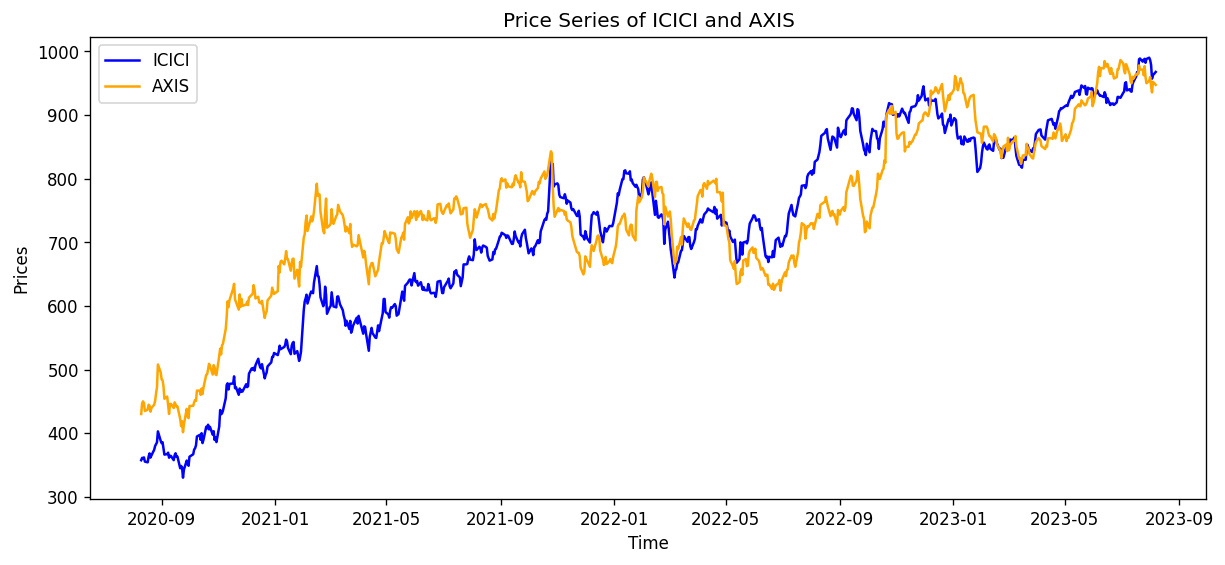

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.figure(figsize = (12,5), dpi = 120)
plt.plot(data_banking_stocks['ICICIBANK.NS'], color = 'blue')
plt.plot(data_banking_stocks['AXISBANK.NS'], color = 'orange')
plt.xlabel('Time')
plt.ylabel('Prices')
#plt.xticks(rotation='vertical')
plt.title("Price Series of ICICI and AXIS")
plt.legend(['ICICI', 'AXIS'])
plt.show();
plt.savefig('uncorrelated.png')

In [ ]:

def optimise_trade(s1,s2, parameter_list, model):
  opt = parameter_list[0]  # stores he optimum parameter
  opt_profit = trade(s1, s2, parameter_list[0][0], parameter_list[0][1], parameter_list[0][2], parameter_list[0][3], model)[0] # stores maximum profit

  for param in tqdm_notebook(parameter_list):
        try:
            profit = trade(s1, s2, param[0], param[1], param[2], param[3], model)[0]
        except:
            continue
        if profit > opt_profit:
          opt = param
          opt_profit = profit
  return(opt, opt_profit)

## Calculating the final results

In [ ]:
stock1 = data_oil_gas_stocks['RELIANCE.NS']
stock2 = data_oil_gas_stocks['GULFOILLUB.NS']

co_integrating_parameters_and_spread(stock1, stock2)

([const            3191.892544
  GULFOILLUB.NS      -1.685460
  dtype: float64],
 'second stock is independent and first one is dependent',
 Date
 2020-08-10   -126.666327
 2020-08-11   -107.366312
 2020-08-12    -75.957031
 2020-08-13   -114.675592
 2020-08-14   -110.252131
                  ...    
 2023-08-01    173.336273
 2023-08-02    143.749084
 2023-08-03    147.818579
 2023-08-04    231.594755
 2023-08-07    277.965460
 Length: 745, dtype: float64)

In [ ]:
'''
s1 = data_oil_gas_stocks['RELIANCE.NS']
s2 = data_oil_gas_stocks['GULFOILLUB.NS']

s2_ = sm.add_constant(s2[:n//2])
model = sm.OLS(s1[:n//2], s2_).fit()

optimise_trade(s1,s2, parameter_list, model)'''

<ipython-input-49-16015fcabf3e>:5: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for param in tqdm_notebook(parameter_list):


  0%|          | 0/142500 [00:00<?, ?it/s]

((8, 30, 0.5, 0.08999999999999998), 81006.93104769645)

In [ ]:
stock1 = data_nifty50_stocks['ASIANPAINT.NS']
stock2 = data_nifty50_stocks['BAJFINANCE.NS']

co_integrating_parameters_and_spread(stock1, stock2)

([const            884.939985
  BAJFINANCE.NS      0.325228
  dtype: float64],
 'second stock is independent and first one is dependent',
 Date
 2020-08-10   -247.868132
 2020-08-11   -245.468396
 2020-08-12   -225.387243
 2020-08-13   -220.657669
 2020-08-14   -192.253980
                  ...    
 2023-08-01     87.874942
 2023-08-02    129.336576
 2023-08-03    133.762122
 2023-08-04    123.933332
 2023-08-07    135.912468
 Length: 744, dtype: float64)

In [ ]:
'''
s1 = data_nifty50_stocks['ASIANPAINT.NS']
s2 = data_nifty50_stocks['BAJFINANCE.NS']

s2_ = sm.add_constant(s2[:n//2])
model = sm.OLS(s1[:n//2], s2_).fit()

optimise_trade(s1,s2, parameter_list, model)'''

<ipython-input-68-16015fcabf3e>:5: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for param in tqdm_notebook(parameter_list):


  0%|          | 0/142500 [00:00<?, ?it/s]

((11, 40, 0.5, 0.01), 106041.998530737)

In [ ]:
stock1 = data_automobile_stocks['MARUTI.NS']
stock2 = data_automobile_stocks['TVSMOTOR.NS']

co_integrating_parameters_and_spread(stock1, stock2)

([const          5510.073911
  TVSMOTOR.NS       2.997624
  dtype: float64],
 'second stock is independent and first one is dependent',
 Date
 2020-08-10   -338.466753
 2020-08-11   -294.247819
 2020-08-12   -217.853062
 2020-08-13   -194.553708
 2020-08-14   -299.470144
                  ...    
 2023-08-01     10.243952
 2023-08-02    -82.245595
 2023-08-03    -52.884411
 2023-08-04   -112.844936
 2023-08-07     -3.989481
 Length: 733, dtype: float64)

In [ ]:
'''
s1 = data_automobile_stocks['MARUTI.NS']
s2 = data_automobile_stocks['TVSMOTOR.NS']

s2_ = sm.add_constant(s2[:n//2])
model = sm.OLS(s1[:n//2], s2_).fit()

optimise_trade(s1,s2, parameter_list, model)'''

<ipython-input-68-16015fcabf3e>:5: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for param in tqdm_notebook(parameter_list):


  0%|          | 0/142500 [00:00<?, ?it/s]

((14, 70, 0.9500000000000004, 0.01), 428921.86399153015)

In [ ]:
stock1 = data_fmcg_stocks['MARICO.NS']
stock2 = data_fmcg_stocks['TATACONSUM.NS']

co_integrating_parameters_and_spread(stock1, stock2)

([const            67.417371
  TATACONSUM.NS     0.573024
  dtype: float64],
 'second stock is independent and first one is dependent',
 Date
 2020-08-10    -3.883639
 2020-08-11    -3.987170
 2020-08-12   -11.127782
 2020-08-13   -21.200461
 2020-08-14   -20.144181
                 ...    
 2023-08-01    -3.788482
 2023-08-02     9.133238
 2023-08-03    23.013186
 2023-08-04    27.185451
 2023-08-07    25.068614
 Length: 733, dtype: float64)

In [ ]:
'''
s1 = data_fmcg_stocks['MARICO.NS']
s2 = data_fmcg_stocks['TATACONSUM.NS']

s2_ = sm.add_constant(s2[:n//2])
model = sm.OLS(s1[:n//2], s2_).fit()

optimise_trade(s1,s2, parameter_list, model)'''

<ipython-input-68-16015fcabf3e>:5: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for param in tqdm_notebook(parameter_list):


  0%|          | 0/142500 [00:00<?, ?it/s]

((10, 70, 0.5, 0.15), 15309.786316226868)

### Showing that co-integration may break

In [ ]:
def train_test(data,threshold = 0.01):
    list_of_stocks = list(data.keys()) # list of stocks
    n = len(list_of_stocks) # number of stocks
    pairs = [] # this list will caputre all the co-integrated pairs
    for i in range(0, n-1):
        stock1 = list_of_stocks[i]
        for j in range(i+1,n):
            stock2 = list_of_stocks[j]
            X1 = data[stock1]
            X2 = data[stock2]
            X1_train = X1.iloc[:len(X1)//2]
            X2_train = X2.iloc[:len(X2)//2]
            X2_test = X2.iloc[len(X2)//2 :]
            X1_test = X1.iloc[len(X1)//2 :]
            result_train = statsmodels.tsa.stattools.coint(X1_train, X2_train, trend='c', method='aeg', maxlag=None, autolag='aic', return_results=None)
            result_test = statsmodels.tsa.stattools.coint(X1_test, X2_test, trend='c', method='aeg', maxlag=None, autolag='aic', return_results=None)
            p_value_train = result_train[1]
            p_value_test = result_test[1]

            if(p_value_train < 0.01 and p_value_test > 0.01):
                pairs.append([list_of_stocks[i], list_of_stocks[j]])
                break
    if (len(pairs) == 0):
        print('None')
    return pairs

In [ ]:
data_oil_gas_stocks.dropna(axis=1, how='any', inplace=True)
pair = train_test(data_oil_gas_stocks, 0.01)
print(pair)

[['OIL.NS', 'HINDOILEXP.NS'], ['MRPL.NS', 'SELAN.NS'], ['ALPHAGEO.NS', 'HINDOILEXP.NS']]


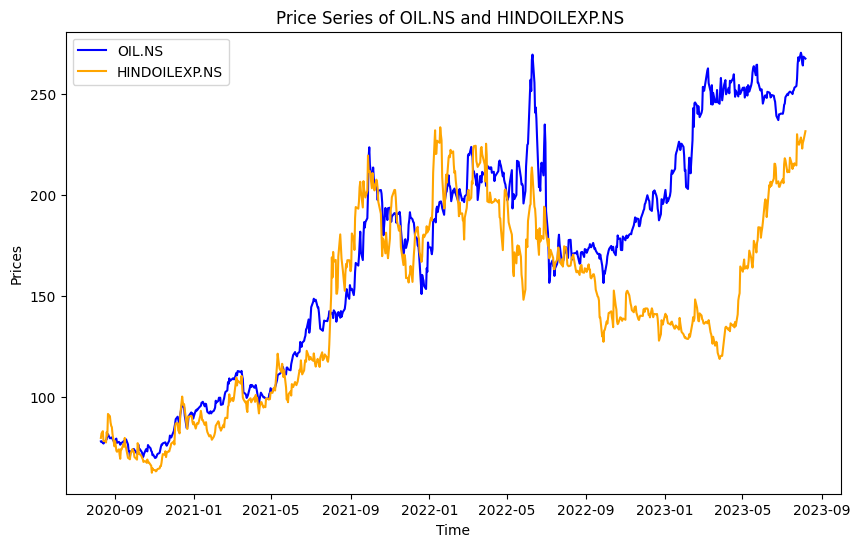

In [ ]:
plt.figure(figsize = (10,6))
plt.plot(data_oil_gas_stocks['OIL.NS'], color = 'blue')
plt.plot(data_oil_gas_stocks['HINDOILEXP.NS'], color = 'orange')
plt.xlabel('Time')
plt.ylabel('Prices')
n = len(data_oil_gas_stocks['OIL.NS'])
plt.title("Price Series of OIL.NS and HINDOILEXP.NS " )
plt.legend(['OIL.NS', 'HINDOILEXP.NS'])
plt.show();